### TISE: Time Independent Schrodinger Equation 1D
$$
-\frac{\hbar ^ 2 }{2m}\frac{d^2 \psi}{dx^2} + V(x)\psi(x) = E\psi(x)
$$
Dimensionless
$$
-\frac{1}{2}\frac{d^2 \psi}{dx'^2} + V'(x)\psi(x) = E'\psi(x)
$$

#### Finite difference:
$$
f'' = \frac{f(x+\Delta x)-2f(x)+f(x-\Delta x)}{\Delta x^2}
$$
Apply finite difference in TISE, $\hbar = 1$:
$$
\psi_{n-1} = -\psi(x_{n-2}) + [2 + 2m\Delta x^2V(x_{n-1})]\psi(x_{n-1}) - \psi(x_n) -2m\Delta x^2 \psi(x_{n-1})
$$
Changing into eigenvalue problem in Matrix form (dimensionless);
$$
M = \begin{bmatrix}
2 & -1 & 0 & 0 & 0\\
-1 & 2 & -1 & 0 & 0\\
0 & -1 & 2 & -1 & 0\\
0 & 0 & -1 & 2 & -1\\
0 & 0 & 0 & -1 & 2\\
\end{bmatrix}
\begin{bmatrix}
\psi(x_1) &\\
\psi(x_2) &\\
\psi(x_3) &\\
\psi(x_4) &\\
\psi(x_5) &\\
\end{bmatrix}
= 2E\begin{bmatrix}
\psi(x_1) &\\
\psi(x_2) &\\
\psi(x_3) &\\
\psi(x_4) &\\
\psi(x_5) &\\
\end{bmatrix}
$$

TISE
$$
-\frac{1}{2}\frac{d^2 \psi}{dx'^2} + V'(x)\psi(x) = E'\psi(x)
$$
TDSE
$$
i\frac{\partial \psi}{\partial t'} = -\frac{1}{2}\frac{\partial^2 \psi}{\partial x'^2 } + V'(x)\psi
$$

In [2]:
# requirements and imports

import numpy as np
import matplotlib.pyplot as plt 
from scipy import sparse
from scipy.sparse.linalg import eigsh
from scipy.sparse.linalg import eigs

In [13]:
# System parameters 
N = 101
# positive length
L = 5
# grid
x,dx = np.linspace(0,L, N , retstep= True)
# time parameters
T = 0.0001
Nt = 10000
dt = 1e-4

In [14]:
# 1D TISE

# potential 

def V_free_particle(x):
    return x * 0 

def V_well(x):
    mu ,sigma = 1/2 , 1/5
    A = -1e2
    return A*np.exp(-(x-mu)**2/(2*sigma**2))

def V_harmonic(x):
    k = 2
    x0 = 2
    return 1/2 * k * (x-x0)**2  -1

def V_barrier(x,peak):
    arr = x.copy()
    arr[:] = 0 
    left = int(len(x) * 1/2)
    right = int(len(x) * (1/2 + 1/100)) 
    arr[left:right]  = peak
    return arr

def step(x,peak = 50):
    arr = x.copy()
    arr[:] = 0 
    left = int(len(x) * 1/2)
    arr[left:]  = peak
    return arr

# matrix 
# dia = np.ones([N])
# diaa = np.array([dia * -1 , 2 * dia, dia * -1])
# dia_potential = sparse.diags(potential(x,mu,sig))
# M = sparse.spdiags(diaa, np.array([-1,0,1]),N,N) + dia_potential
# # print(M.toarray())
# e_values , e_vectors = eigsh(M, which = 'SA', k = 5)
# print(e_values)
# plt.plot(x,potential(x,mu,sig))

# plt.plot(x,e_vectors.T[0]**2, label = "0")
# plt.plot(x,e_vectors.T[0])

# plt.plot(x,e_vectors.T[1]**2, label = "1")
# plt.plot(x,e_vectors.T[1])

# plt.plot(x,e_vectors.T[2]**2, label = "2")
# plt.plot(x,e_vectors.T[2])

# fig, ax = plt.subplots(5,figsize = (20,20))
# for n in range(5):
#     ax[n].plot(x,e_vectors.T[n]**2,label = n)
#     # plt.plot(x,e_vectors.T[n]**2, label = n)
# plt.title(label = "Probability density")
# plt.legend()
# plt.show()

In [15]:
# matrix simulation
V0 = V_free_particle(x)

dia = np.ones([N])
diaa = np.array([dia * -1 , 2 * dia, dia * -1])
dia_potential = sparse.diags(V0)
M = sparse.spdiags(diaa, np.array([-1,0,1]),N,N) + dia_potential
# print(M.toarray())
e_values , e_vectors = eigsh(M, which = 'SA', k = 5)

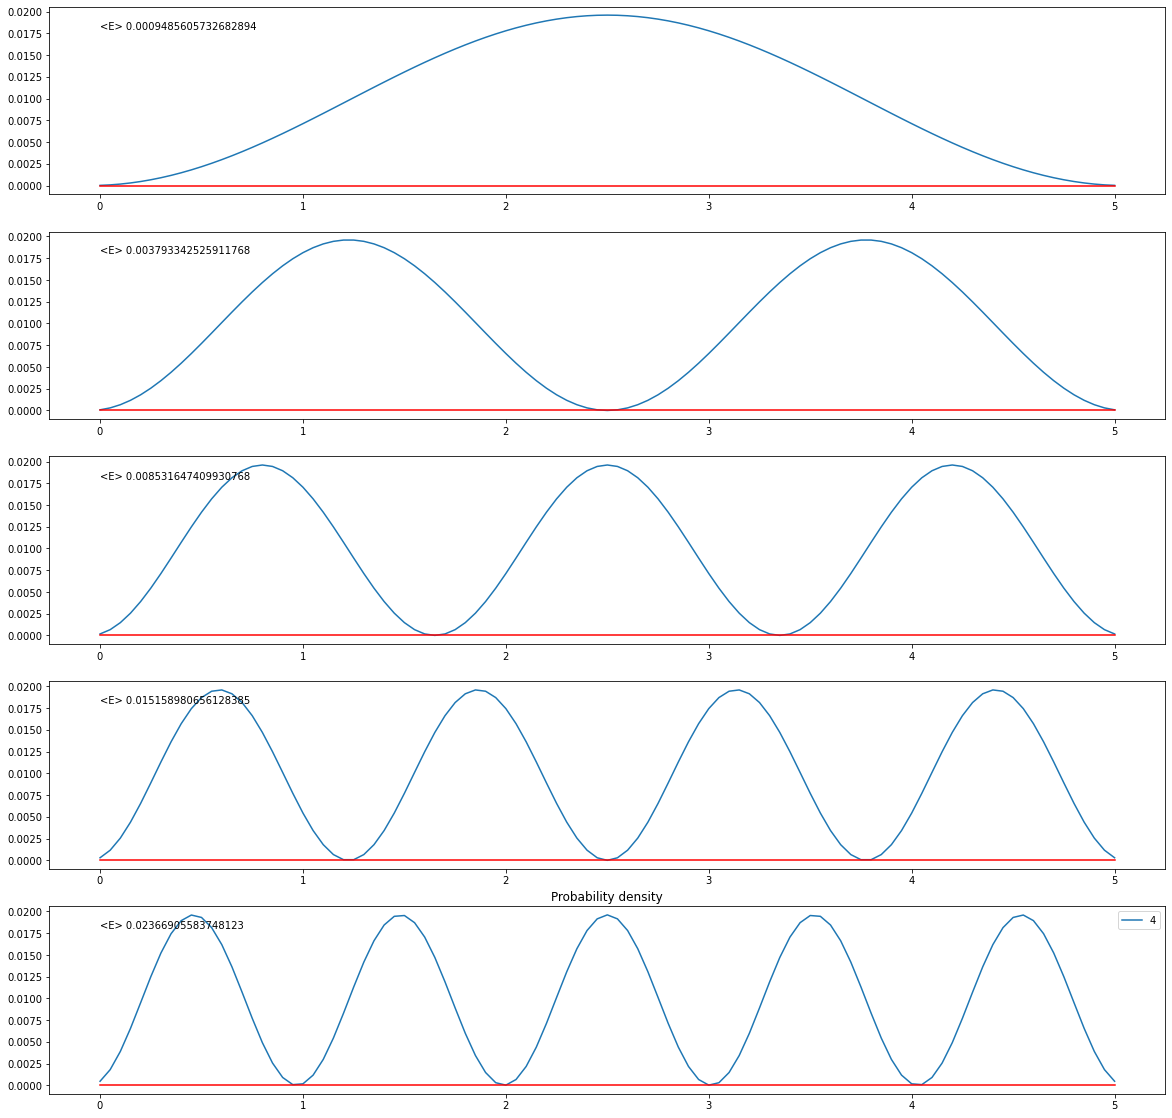

In [16]:
# plot
fig, ax = plt.subplots(5,figsize = (20,20))
for n in range(5):
    ax[n].plot(x,e_vectors.T[n]**2,label = n)
    ax[n].plot(x,V0 ,color = 'r')
    ax[n].text(0 , 0.018, f'<E> {e_values[n]}')
    # plt.plot(x,e_vectors.T[n]**2, label = n)
plt.title(label = "Probability density")
plt.legend()
plt.show()

In [17]:
e_values[1] / e_values[0]

3.9990514394264887